In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path.ls()[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/japanese_chin_125.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_155.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Siamese_56.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bombay_111.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_11.jpg')]

In [4]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=.4, max_warp=.4, 
                      p_affine=1., p_lighting=1.)

In [5]:
src = ImageList.from_folder(path).split_by_rand_pct(.2, seed=2)

In [6]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
            .transform(tfms, size=size, padding_mode=padding_mode)
            .databunch(bs=bs).normalize(imagenet_stats))

In [8]:
data = get_data(224, bs, 'zeros')

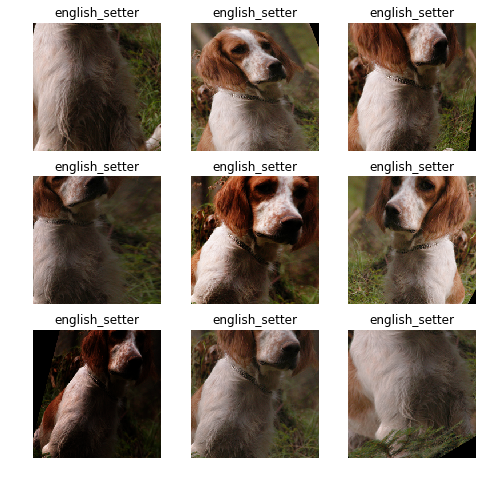

In [9]:
def _plot(i, j, ax):
    x, y = data.train_ds[11]
    x.show(ax, y=y)
    
plot_multi(_plot, r=3, c=3, figsize=(8, 8))

In [10]:
data = get_data(224, bs)

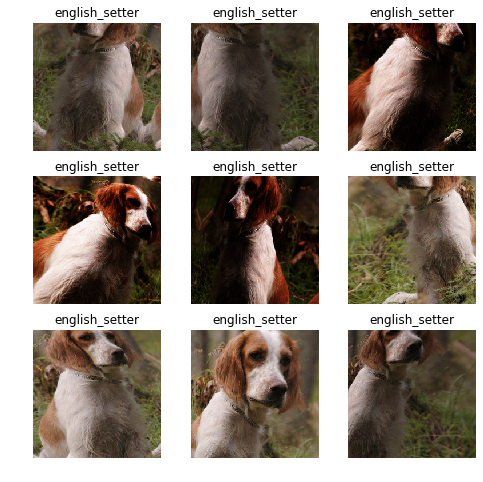

In [11]:
plot_multi(_plot, r=3, c=3, figsize=(8, 8))

In [7]:
gc.collect()

22

In [13]:
learn = cnn_learner(data, base_arch=models.resnet34, metrics=error_rate, bn_final=True)

In [14]:
learn.fit_one_cycle(cyc_len=3, max_lr=slice(1e-2), pct_start=.8)

epoch,train_loss,valid_loss,error_rate,time
0,2.388906,1.079148,0.239513,00:35
1,1.396387,0.347455,0.086604,00:32
2,0.880808,0.287592,0.075101,00:32


In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-3), pct_start=.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.668652,0.296534,0.069012,00:41
1,0.628671,0.293986,0.062923,00:40


In [17]:
data = get_data(352, bs)
learn.data = data

In [18]:
learn.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.601307,0.280866,0.063599,01:34
1,0.575843,0.282216,0.065629,01:32


In [26]:
learn.save('352')

In [8]:
data = get_data(352, bs=16)

In [9]:
learn = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate, bn_final=True)

In [10]:
learn.load('352');

Category Maine_Coon

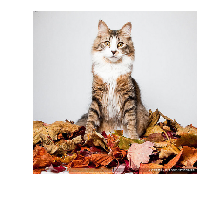

In [22]:
idx = 0
x, y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [23]:
k = tensor([[0, -5/3, 1],
            [-5/3, -5/3, 1],
            [1, 1, 1]]).expand(1, 3, 3, 3) / 6

In [24]:
k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

In [25]:
k.shape

torch.Size([1, 3, 3, 3])

In [27]:
t = data.valid_ds[0][0].data

In [28]:
t.shape

torch.Size([3, 352, 352])

In [33]:
t[None].shape

torch.Size([1, 3, 352, 352])

In [24]:
k.shape

torch.Size([1, 3, 3, 3])

In [34]:
edge = F.conv2d(t[None], k)

In [35]:
edge.shape

torch.Size([1, 1, 350, 350])

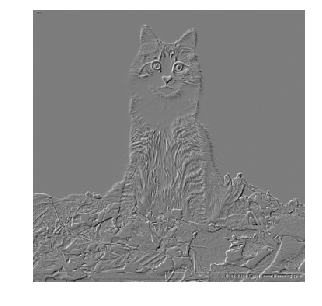

In [38]:
show_image(edge[0], figsize=(5, 5));

In [39]:
data.c

37

In [40]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [146]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 176, 176]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
ReLU                 [64, 176, 176]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
______________________________________________________________

In [13]:
m = learn.model.eval();

In [14]:
xb, _ = data.one_item(x)
xb = xb.cuda()

NameError: name 'x' is not defined

In [44]:
xb.shape

torch.Size([1, 3, 352, 352])

> Looking at m[-1], why isn't the last layer something like a softmax?

In [11]:
from fastai.callbacks.hooks import *

> I can see that hooks are place for the 1st part of the model, `m[0]`, so maybe they are for looking at the activations at the end of `m[0]`.  The model predicts on `xb`, not just `m`.  Backward pass is starts from the activation that corresponds to the predicted class, not from some loss function.  Is this because we want to see how this activation value varies with everything?  

In [23]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a:
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0, int(cat)].backward()
    return hook_a, hook_g

In [58]:
hook_a, hook_g = hooked_backward()

In [59]:
acts = hook_a.stored[0].cpu()

In [24]:
acts.shape

torch.Size([512, 11, 11])

The size of the activation `acts` is probably consistent witht the last layers of `m[0]`, which do have 512 channels.

In [62]:
avg_acts = acts.mean(0)

In [63]:
avg_acts.shape

torch.Size([11, 11])

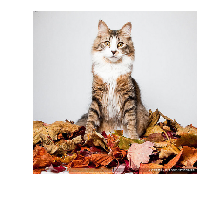

In [64]:
x.show()

In [16]:
def show_heatmap(hm):
    _, ax = plt.subplots()
    x.show(ax=ax)
    print(hm.shape)
    ax.imshow(hm, alpha=.6, cmap='magma', extent=(0,352,352,0), interpolation='bilinear')

torch.Size([11, 11])


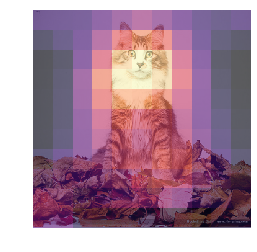

In [66]:
show_heatmap(avg_acts)

In [38]:
plt.imshow?

In [72]:
hook_a.stored[0].shape

torch.Size([512, 11, 11])

In [71]:
hook_g.stored[0].shape

torch.Size([1, 512, 11, 11])

> Why are the sizes of `hook_a.stored[0]` and `hook_g.stored[0]` `[512, 11, 11]` and `[1, 512, 11, 11]`, respectively?

In [73]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape, grad_chan.shape

(torch.Size([512, 11, 11]), torch.Size([512]))

In [75]:
grad.shape

torch.Size([512, 11, 11])

In [64]:
mult = (acts * grad_chan[..., None, None]).mean(0)

torch.Size([11, 11])


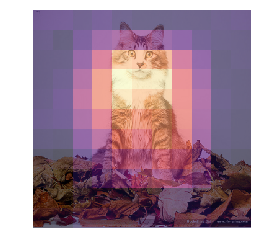

In [66]:
show_heatmap(mult)

In [34]:
x, y = data.valid_ds[11]

In [35]:
x.shape, type(x), x

(torch.Size([3, 352, 352]), fastai.vision.image.Image, Image (3, 352, 352))

In [19]:
y

Category Maine_Coon

In [20]:
xb, _ = data.one_item(x)

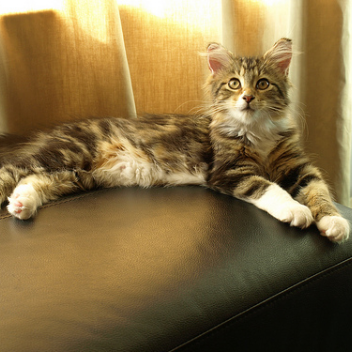

In [21]:
Image(data.denorm(xb[0]))

In [24]:
hook_a, hook_g = hooked_backward()

In [25]:
acts = hook_a.stored[0]
grad = hook_g.stored[0][0]
grad_chan = grad.mean(1).mean(1)
acts.shape, grad.shape, grad_chan.shape

(torch.Size([512, 11, 11]), torch.Size([512, 11, 11]), torch.Size([512]))

In [26]:
mult = (acts * grad_chan[...,None,None]).mean(0)

torch.Size([11, 11])


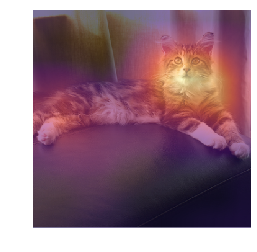

In [27]:
show_heatmap(mult)

In [28]:
fn = path/'../other/Posh-Pets-Photography-two-dogs.jpg'

In [75]:
x = open_image(fn)

In [76]:
x.shape, type(x), x

(torch.Size([3, 600, 900]), fastai.vision.image.Image, Image (3, 600, 900))

In [77]:
xb, _ = data.one_item(x)

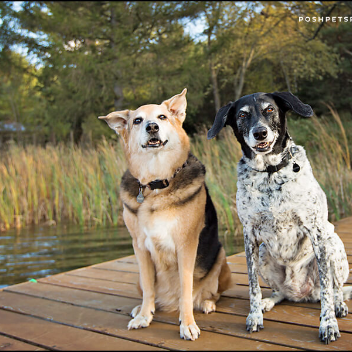

In [78]:
xb_im = Image(data.denorm(xb)[0]); xb_im

In [79]:
xb_im.shape, type(xb_im)

(torch.Size([3, 352, 352]), fastai.vision.image.Image)

> Why is the image reconstructed this different from the original?

In [80]:
xb = xb.cuda()

In [81]:
hook_a, hook_g = hooked_backward(cat=data.classes.index('german_shorthaired'))
#hook_a, hook_g = hooked_backward(cat=3)

In [82]:
acts = hook_a.stored[0].cpu()
grad = hook_g.stored[0][0].cpu()

In [86]:
grad_chan = grad.mean(1).mean(1)
mult = (acts * grad_chan[...,None,None]).mean(0)

In [83]:
acts_avg = acts.mean(0)

In [84]:
def show_heatmap(hm):
    _, ax = plt.subplots()
    xb_im.show(ax=ax)
    print(hm.shape)
    ax.imshow(hm, alpha=.6, cmap='magma', extent=(0,352,352,0), interpolation='bilinear')

torch.Size([11, 11])


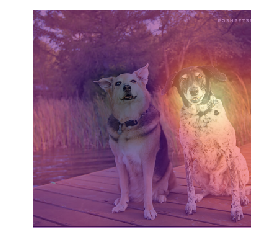

In [87]:
show_heatmap(mult)

torch.Size([11, 11])


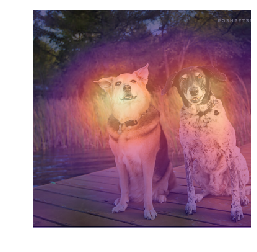

In [85]:
show_heatmap(acts_avg)

> Why is does the Grad CAM work much better than simply the activations?

## fin